# Cálculo de coeficientes de correlação

## Objetivo: Explicar o que são os coeficientes de correlação de Pearson e Spearman, quando utilizá-los, e como calculá-los.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('materiais de aula/survey_results_public.csv', index_col='ResponseId')
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [3]:
import seaborn as sns

sns.set()
sns.set_context('notebook')

### Correlação e linearidade

Qual a correlação de uma função não linear?

Correlação entre X e X^5: 0.821


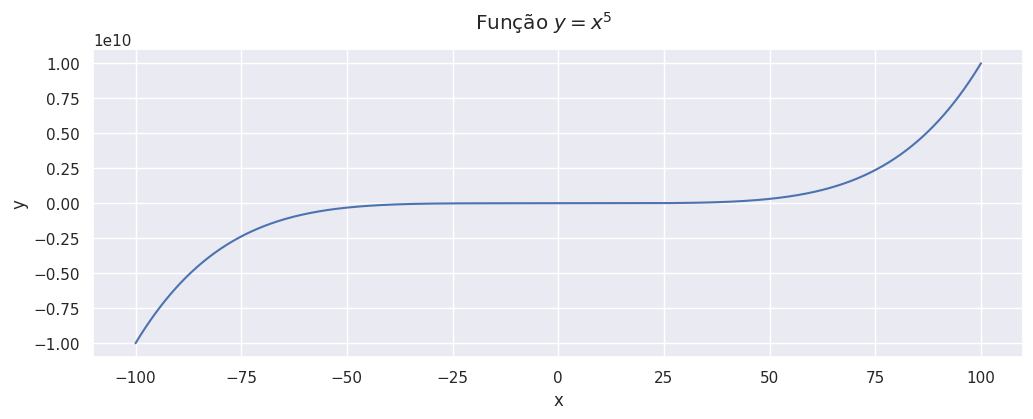

In [4]:
import numpy as np
from scipy.stats import pearsonr

x = np.linspace(-100, 100, 1000)
y = x**5

corr, _ = pearsonr(x, y)
print(f'Correlação entre X e X^5: {corr:.3f}')

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(ax=ax, x=x, y=y)
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.suptitle('Função $y = x^5$')
plt.show()

Os valores de X e Y estão crescendo de forma ordenada: quanto maior o X, maior o Y. Contudo, como eles não crescem na mesma **proporção**, a correlação de Pearson não é perfeita, com `r < 1.0`.

A correlação de Pearson só é próxima do valor 1 quando a relação entre variáveis é **linear**.

Se quisermos calcular uma correlação entre duas variáveis **independente da proporcionalidade entre elas**, devemos usar a **correlação de Spearman**.

### Correlação de Spearman

Os ajustes para calcular a correlação de spearman são mínimos:

Correlação de Pearson entre X e X^5: 0.821
Correlação de Spearman entre X e X^5: 1.000


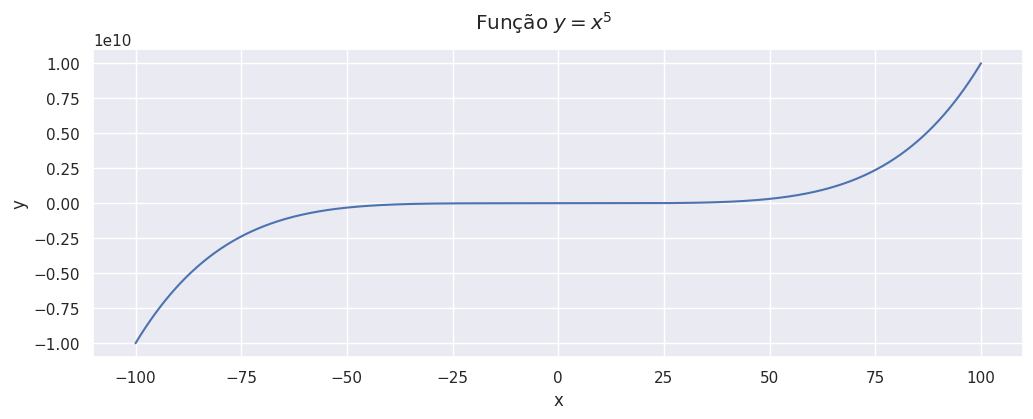

In [5]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

x = np.linspace(-100, 100, 1000)
y = x**5

pearson_corr, _ = pearsonr(x, y)
print(f'Correlação de Pearson entre X e X^5: {pearson_corr:.3f}')
spearman_corr, _ = spearmanr(x, y)
print(f'Correlação de Spearman entre X e X^5: {spearman_corr:.3f}')

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(ax=ax, x=x, y=y)
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.suptitle('Função $y = x^5$')
plt.show()

Como podemos ver, a correlação de Spearman não olha para a linearidade dos dados, mas apenas confere se a relação cresce (ou diminui) de forma contínua.

Outra forma de pensar: se o coeficiente de correlação de Spearman entre X e Y for 1, então se ordenarmos os valores X de forma crescente, os valores de Y também ficarão ordenados.

### Escolhendo a correlação no DataFrame

Ao chamarmos `df.corr()`, podemos indicar o tipo de correlação usando um argumento (por padrão, a correlação de Pearson é aplicada).

Vamos ver a aplicação nos dados abaixo. Inicialmente, veremos os dados plotados:

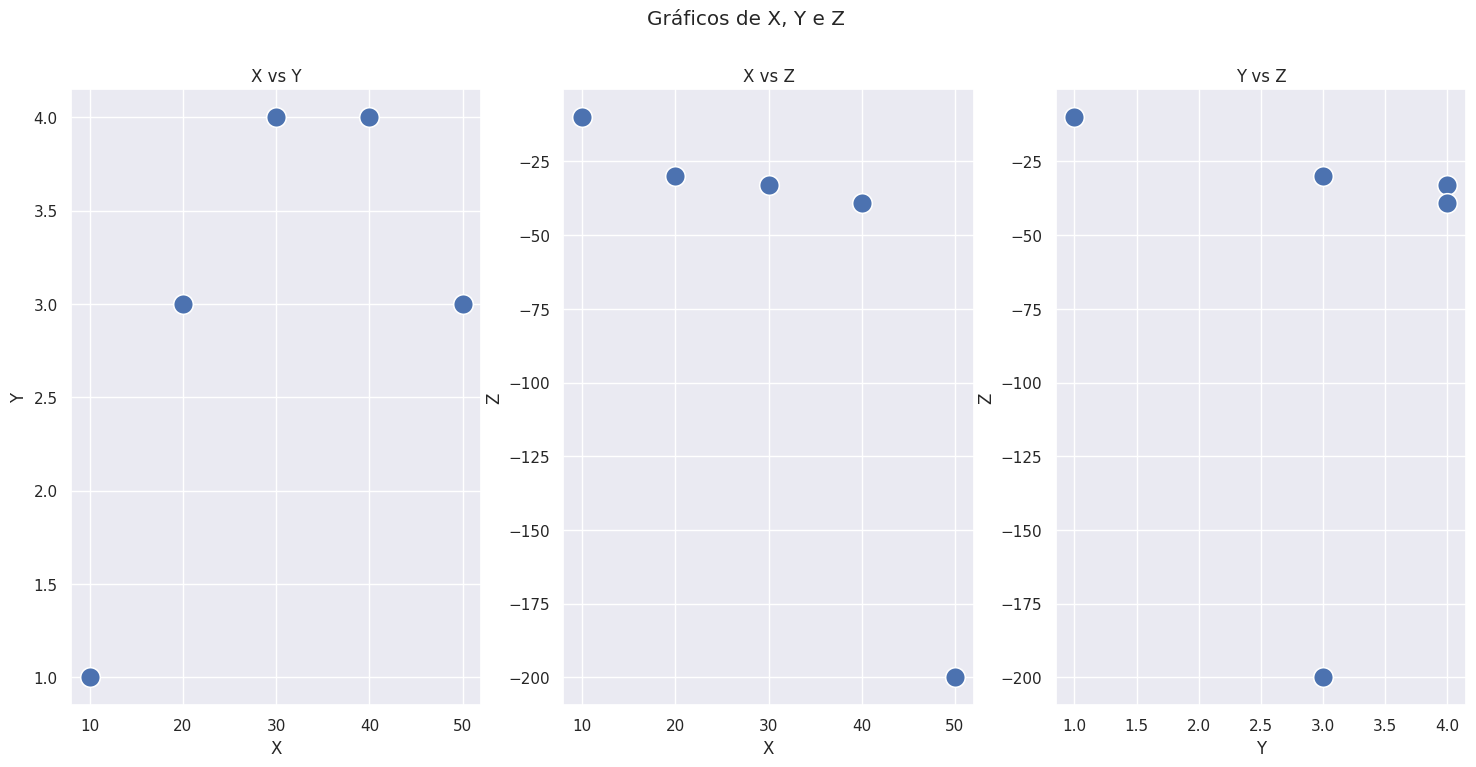

In [9]:
df = pd.DataFrame({
    'X': [10, 20, 30, 40, 50],
    'Y': [1, 3, 4, 4, 3],
    'Z': [-10, -30, -33, -39, -200],
})

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18, 8), ncols=3)

sns.scatterplot(data=df, ax=ax1, x='X', y='Y', s=200)
ax1.set_title('X vs Y')
sns.scatterplot(data=df, ax=ax2, x='X', y='Z', s=200)
ax2.set_title('X vs Z')
sns.scatterplot(data=df, ax=ax3, x='Y', y='Z', s=200)
ax3.set_title('Y vs Z')

fig.suptitle('Gráficos de X, Y e Z')
plt.show()

E a correlação, comparando os métodos de Pearson e Spearman:

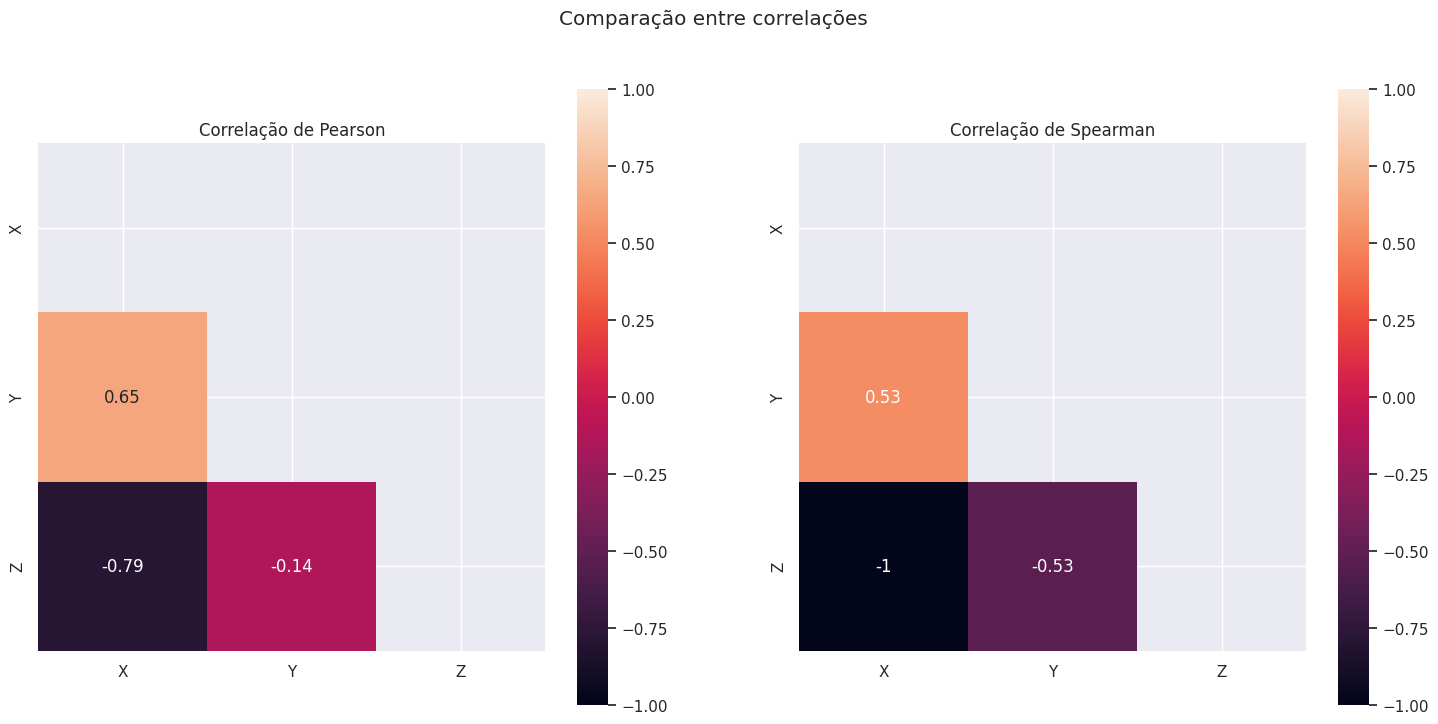

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)

mask = np.triu(df.corr())

sns.heatmap(data=df.corr('pearson'), ax=ax1, annot=True, cbar=True, square=True, cmap='rocket', vmax=1.0, vmin=-1.0, mask=mask)
ax1.set_title('Correlação de Pearson')
sns.heatmap(data=df.corr('spearman'), ax=ax2, annot=True, cbar=True, square=True, cmap='rocket', vmax=1.0, vmin=-1.0, mask=mask)
ax2.set_title('Correlação de Spearman')

fig.suptitle('Comparação entre correlações')
plt.show()

### Quando usar Pearson ou Spearman?

De certa forma, a correlação de Spearman é uma versão mais "relaxada" da correlação de Pearson.

Em termos estatísticos, a correlação de Spearman é uma versão **não-paramétrica** da correlação de Pearson, uma vez que **não depende dos parâmetros dos dados** (isto é, dos valores de cada elemento individual).

Em resumo:
- Se fizer sentido relacionar as variáveis de forma proporcional ("a cada X unidades de altura, aumento Y unidades de peso"), então use a correlação de Pearson.
- Se só quiser saber quem ficou na frente de quem, em um formato de ranking ("os nadadores mais rápidos são também os corredores mais rápidos"), então use a correlação de Spearman.